# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:36:57.764678: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:37:00.698559
2025-04-14 20:37:00.698559


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:36:55"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

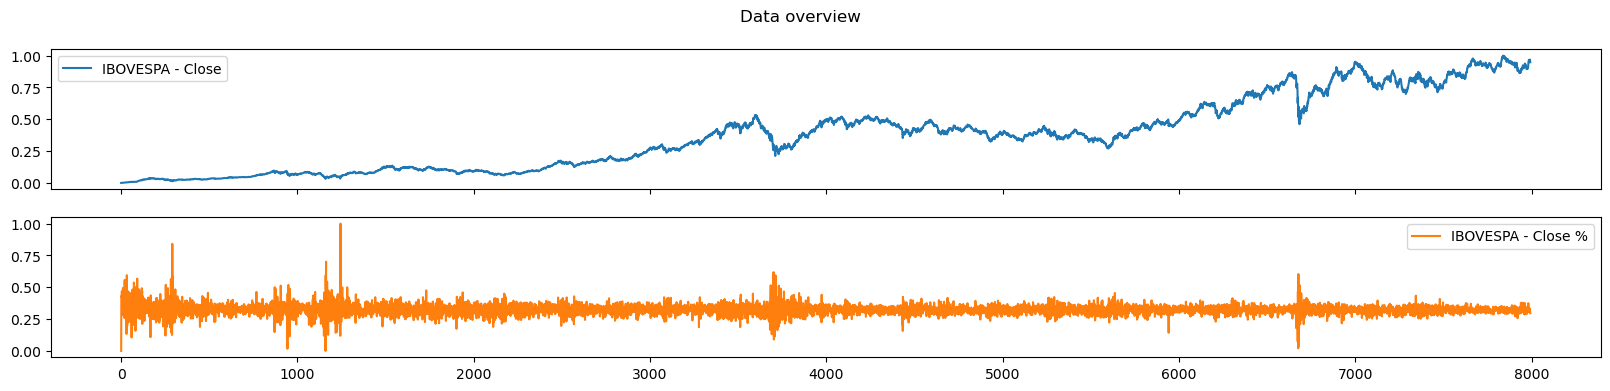

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

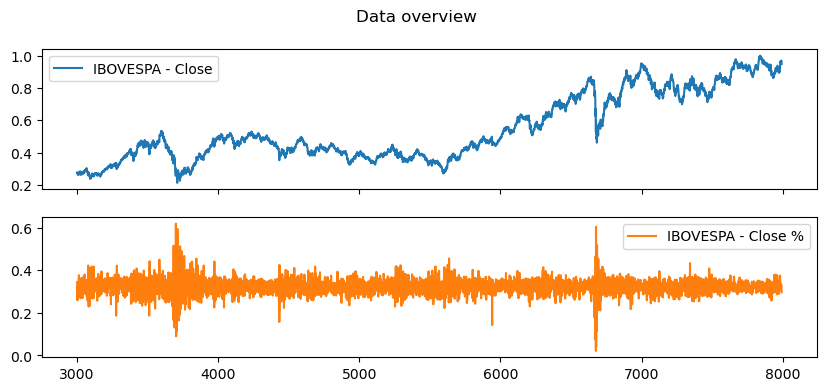

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

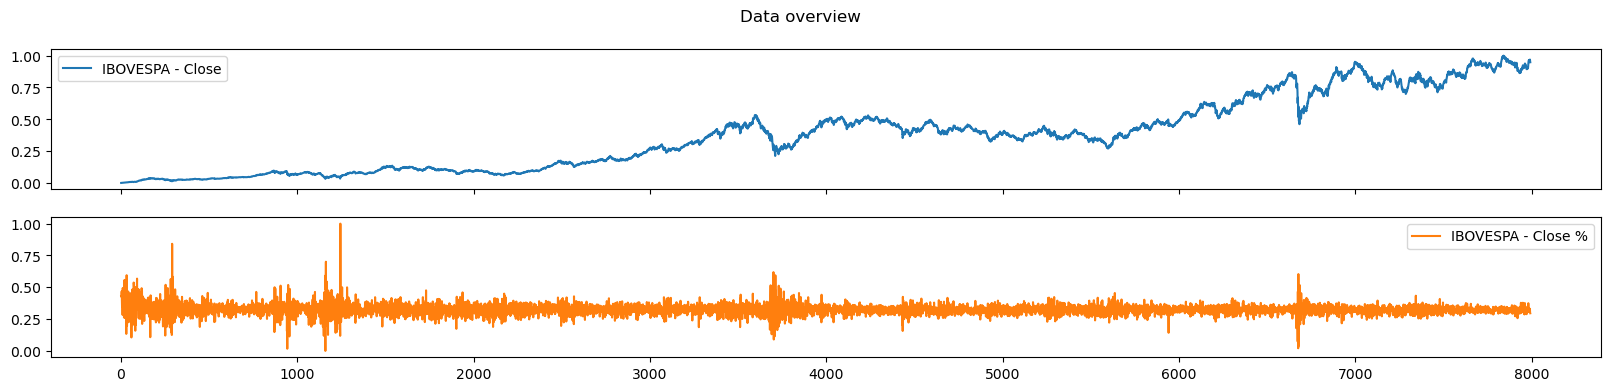

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

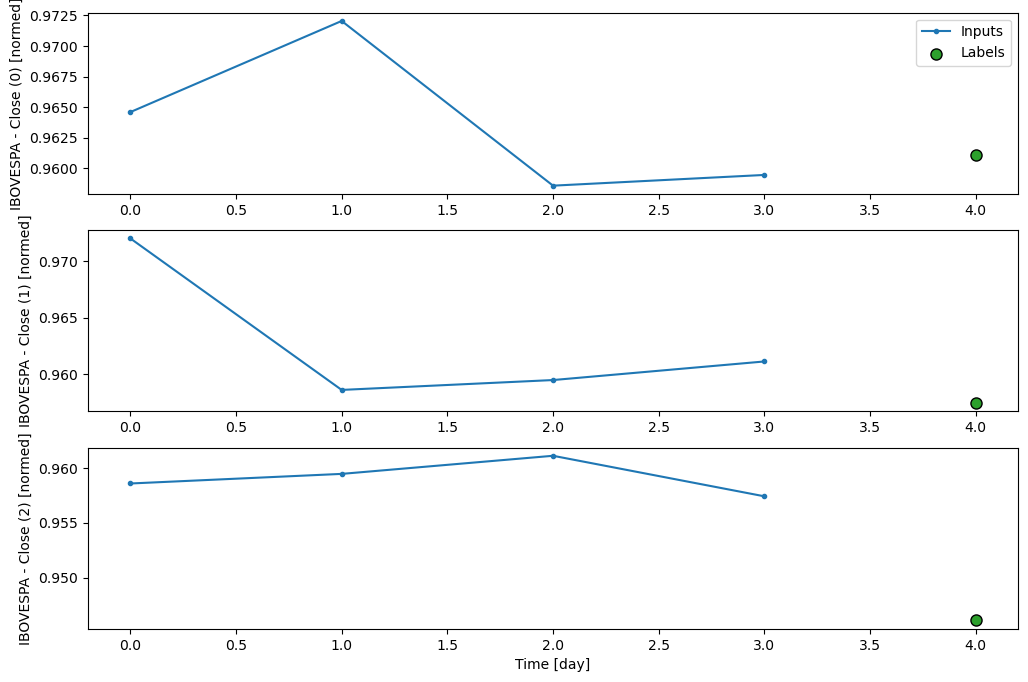

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:43 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 91.5077 - mean_squared_error: 1.9991e-04 - root_mean_squared_error: 0.0135  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 70.6867 - mean_squared_error: 1.7624e-04 - root_mean_squared_error: 0.0129

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 58.6154 - mean_squared_error: 1.8037e-04 - root_mean_squared_error: 0.0132

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.3289 - mean_squared_error: 2.0249e-04 - root_mean_squared_error: 0.0140

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.5528 - mean_squared_error: 2.2525e-04 - root_mean_squared_error: 0.0147

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 44.0212 - mean_squared_error: 2.4146e-04 - root_mean_squared_error: 0.0153

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 42.0242 - mean_squared_error: 2.6451e-04 - root_mean_squared_error: 0.0159

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 40.0920 - mean_squared_error: 2.8559e-04 - root_mean_squared_error: 0.0165

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 38.1114 - mean_squared_error: 3.2330e-04 - root_mean_squared_error: 0.0175

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 36.5691 - mean_squared_error: 3.8758e-04 - root_mean_squared_error: 0.0188

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 35.2505 - mean_squared_error: 5.8599e-04 - root_mean_squared_error: 0.0217

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 34.1371 - mean_squared_error: 8.1234e-04 - root_mean_squared_error: 0.0248

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 33.1376 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0273    

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 32.2957 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 31.4658 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0312

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 30.7181 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 30.0172 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 29.4285 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 28.7769 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0379

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 28.7318 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0380 - val_loss: 0.0790 - val_mean_absolute_error: 0.0790 - val_mean_absolute_percentage_error: 8.4092 - val_mean_squared_error: 0.0073 - val_root_mean_squared_error: 0.0855 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6628 - mean_absolute_error: 0.6628 - mean_absolute_percentage_error: 28634.5352 - mean_squared_error: 0.4394 - root_mean_squared_error: 0.6629

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6168 - mean_absolute_error: 0.6168 - mean_absolute_percentage_error: 10459.6416 - mean_squared_error: 0.3861 - root_mean_squared_error: 0.6202 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5076 - mean_absolute_error: 0.5076 - mean_absolute_percentage_error: 6943.8130 - mean_squared_error: 0.2962 - root_mean_squared_error: 0.5363 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4328 - mean_absolute_error: 0.4328 - mean_absolute_percentage_error: 5420.7920 - mean_squared_error: 0.2429 - root_mean_squared_error: 0.4796

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 4431.7729 - mean_squared_error: 0.2045 - root_mean_squared_error: 0.4346

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 3775.2764 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.4007

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 3303.9866 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3739

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2741 - mean_absolute_error: 0.2741 - mean_absolute_percentage_error: 2947.0574 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3520

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 2666.2490 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3338

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 2454.8303 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3193

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 2264.1323 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.3060

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 2103.5762 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2943

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 1966.3225 - mean_squared_error: 0.0977 - root_mean_squared_error: 0.2840

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 1847.4637 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2748

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 1743.4359 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2665

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 1651.5743 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2589

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1692 - mean_absolute_error: 0.1692 - mean_absolute_percentage_error: 1569.7880 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2521

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1635 - mean_absolute_error: 0.1635 - mean_absolute_percentage_error: 1496.4495 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2458

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 1430.2788 - mean_squared_error: 0.0728 - root_mean_squared_error: 0.2401

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 1397.2527 - mean_squared_error: 0.0712 - root_mean_squared_error: 0.2372 - val_loss: 0.0485 - val_mean_absolute_error: 0.0485 - val_mean_absolute_percentage_error: 5.1621 - val_mean_squared_error: 0.0029 - val_root_mean_squared_error: 0.0536 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4876 - mean_absolute_error: 0.4876 - mean_absolute_percentage_error: 21035.1289 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4876

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4691 - mean_absolute_error: 0.4691 - mean_absolute_percentage_error: 7464.9424 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4697  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4160 - mean_absolute_error: 0.4160 - mean_absolute_percentage_error: 5160.0454 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4277

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 4022.4167 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3866

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 3373.9673 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3568

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 2954.3398 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3347

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 2586.8845 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.3132

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 2327.4670 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2968

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 2151.6021 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.2850

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 2030.8167 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2766

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 1911.7445 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2680

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 1796.3898 - mean_squared_error: 0.0773 - root_mean_squared_error: 0.2594

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 1686.1232 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2509

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 1589.8785 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2432

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 1505.0653 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2363

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1587 - mean_absolute_error: 0.1587 - mean_absolute_percentage_error: 1429.7047 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2299

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1528 - mean_absolute_error: 0.1528 - mean_absolute_percentage_error: 1362.2427 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2241

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 1301.4656 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2187

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1421 - mean_absolute_error: 0.1421 - mean_absolute_percentage_error: 1241.6331 - mean_squared_error: 0.0551 - root_mean_squared_error: 0.2133

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 1191.8782 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2087

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1338 - mean_absolute_error: 0.1338 - mean_absolute_percentage_error: 1146.3392 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2045

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - mean_absolute_percentage_error: 1097.2324 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.1999

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 1093.6525 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.1995 - val_loss: 0.0149 - val_mean_absolute_error: 0.0149 - val_mean_absolute_percentage_error: 1.6165 - val_mean_squared_error: 3.6940e-04 - val_root_mean_squared_error: 0.0192 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 12204.6260 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2834

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 4410.7852 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2556  

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 3054.3262 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2220

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 2338.9482 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1961

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 1889.2765 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1763

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 1596.7428 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1616

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 1461.7206 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1542

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 1349.8470 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1478

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1244.6787 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1416

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 1147.2057 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1355

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 1072.8448 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1307

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 1015.1442 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1268

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 951.9882 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1224 

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 896.9314 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1185

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 843.9296 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1146

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 809.5150 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1121

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 789.5323 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1105

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 766.9415 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1088

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 759.7242 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1082

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 756.1715 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1080

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 749.1749 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1074

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 742.3194 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1069

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 725.7706 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1055

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 710.0147 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1043

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 692.0729 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1028

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 677.8654 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1017

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 669.6443 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1010

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 643.7557 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0988

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 624.5756 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0972

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 606.6143 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0957

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 589.7549 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0943

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 570.0782 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0926 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0822 - val_mean_squared_error: 1.5915e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 3007.1123 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0698

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 1244.2358 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 1004.9478 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0496

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 770.1912 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0442  

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 617.5502 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 564.1140 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 475.2025 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 418.9608 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 371.1473 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 334.1089 - mean_squared_error: 9.9372e-04 - root_mean_squared_error: 0.0292

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 301.5422 - mean_squared_error: 9.0404e-04 - root_mean_squared_error: 0.0276

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 275.3282 - mean_squared_error: 8.3093e-04 - root_mean_squared_error: 0.0263

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 257.7332 - mean_squared_error: 7.8142e-04 - root_mean_squared_error: 0.0254

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 238.9611 - mean_squared_error: 7.2847e-04 - root_mean_squared_error: 0.0244

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 233.9073 - mean_squared_error: 7.1425e-04 - root_mean_squared_error: 0.0242

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 230.6686 - mean_squared_error: 7.0518e-04 - root_mean_squared_error: 0.0240

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 229.0865 - mean_squared_error: 7.0076e-04 - root_mean_squared_error: 0.0239

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 225.9938 - mean_squared_error: 6.9214e-04 - root_mean_squared_error: 0.0238

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 220.0817 - mean_squared_error: 6.7603e-04 - root_mean_squared_error: 0.0235

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 205.4847 - mean_squared_error: 6.3904e-04 - root_mean_squared_error: 0.0228

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 195.0630 - mean_squared_error: 6.1586e-04 - root_mean_squared_error: 0.0224

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 185.7557 - mean_squared_error: 5.9555e-04 - root_mean_squared_error: 0.0221

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 177.3852 - mean_squared_error: 5.7716e-04 - root_mean_squared_error: 0.0217

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 175.6374 - mean_squared_error: 5.7327e-04 - root_mean_squared_error: 0.0217

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 173.9274 - mean_squared_error: 5.6943e-04 - root_mean_squared_error: 0.0216

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 169.8098 - mean_squared_error: 5.6010e-04 - root_mean_squared_error: 0.0215

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 165.9029 - mean_squared_error: 5.5116e-04 - root_mean_squared_error: 0.0213

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 162.9181 - mean_squared_error: 5.4425e-04 - root_mean_squared_error: 0.0212

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 157.9720 - mean_squared_error: 5.3270e-04 - root_mean_squared_error: 0.0210

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 153.9901 - mean_squared_error: 5.2331e-04 - root_mean_squared_error: 0.0208

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 151.4568 - mean_squared_error: 5.1730e-04 - root_mean_squared_error: 0.0207

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 150.8378 - mean_squared_error: 5.1582e-04 - root_mean_squared_error: 0.0206

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 150.2244 - mean_squared_error: 5.1436e-04 - root_mean_squared_error: 0.0206

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 149.0141 - mean_squared_error: 5.1147e-04 - root_mean_squared_error: 0.0206

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 146.6571 - mean_squared_error: 5.0582e-04 - root_mean_squared_error: 0.0204

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 143.2724 - mean_squared_error: 4.9768e-04 - root_mean_squared_error: 0.0203

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 140.0561 - mean_squared_error: 4.9001e-04 - root_mean_squared_error: 0.0201

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 137.4959 - mean_squared_error: 4.8408e-04 - root_mean_squared_error: 0.0200

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 136.5006 - mean_squared_error: 4.8179e-04 - root_mean_squared_error: 0.0200

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 135.5212 - mean_squared_error: 4.7955e-04 - root_mean_squared_error: 0.0199

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 134.5571 - mean_squared_error: 4.7734e-04 - root_mean_squared_error: 0.0199

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 133.1393 - mean_squared_error: 4.7409e-04 - root_mean_squared_error: 0.0198

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 131.7541 - mean_squared_error: 4.7094e-04 - root_mean_squared_error: 0.0198

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 129.0775 - mean_squared_error: 4.6491e-04 - root_mean_squared_error: 0.0197

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 127.3589 - mean_squared_error: 4.6103e-04 - root_mean_squared_error: 0.0196

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 126.5194 - mean_squared_error: 4.5914e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1120 - val_mean_squared_error: 1.6603e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 3738.3101 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0867

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 1328.2057 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 836.4227 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0522 

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 679.2752 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0470

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 606.6603 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 558.3220 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 496.7159 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 433.1383 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 381.6415 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 357.4425 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 348.0927 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 328.2678 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 299.5409 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 275.8820 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 259.1231 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 243.1212 - mean_squared_error: 9.5900e-04 - root_mean_squared_error: 0.0277

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 230.3592 - mean_squared_error: 9.1610e-04 - root_mean_squared_error: 0.0270

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 217.9260 - mean_squared_error: 8.7389e-04 - root_mean_squared_error: 0.0264

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 207.8415 - mean_squared_error: 8.3931e-04 - root_mean_squared_error: 0.0258

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 201.3746 - mean_squared_error: 8.1701e-04 - root_mean_squared_error: 0.0254

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 194.5086 - mean_squared_error: 7.9327e-04 - root_mean_squared_error: 0.0250

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 192.0655 - mean_squared_error: 7.8482e-04 - root_mean_squared_error: 0.0249

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 184.3904 - mean_squared_error: 7.5829e-04 - root_mean_squared_error: 0.0245

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 178.7218 - mean_squared_error: 7.3892e-04 - root_mean_squared_error: 0.0241

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 174.7175 - mean_squared_error: 7.2563e-04 - root_mean_squared_error: 0.0239

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 170.2915 - mean_squared_error: 7.1188e-04 - root_mean_squared_error: 0.0237

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 165.5300 - mean_squared_error: 6.9879e-04 - root_mean_squared_error: 0.0235

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 158.9176 - mean_squared_error: 6.8200e-04 - root_mean_squared_error: 0.0233

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 158.3938 - mean_squared_error: 6.8069e-04 - root_mean_squared_error: 0.0233 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8339 - val_mean_squared_error: 9.3278e-05 - val_root_mean_squared_error: 0.0097 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 3061.6143 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0711

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 1601.4551 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0620

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 952.8350 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0504  

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 751.0579 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 657.4946 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 552.5681 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 479.6430 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 408.5582 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 361.5703 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 328.4865 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 301.5066 - mean_squared_error: 9.9063e-04 - root_mean_squared_error: 0.0291

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 279.0425 - mean_squared_error: 9.2244e-04 - root_mean_squared_error: 0.0279

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 263.9889 - mean_squared_error: 8.7652e-04 - root_mean_squared_error: 0.0271

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 250.6432 - mean_squared_error: 8.3591e-04 - root_mean_squared_error: 0.0264

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 235.5420 - mean_squared_error: 7.9041e-04 - root_mean_squared_error: 0.0256

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 219.6430 - mean_squared_error: 7.4573e-04 - root_mean_squared_error: 0.0248

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 205.9772 - mean_squared_error: 7.1051e-04 - root_mean_squared_error: 0.0242

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 198.2235 - mean_squared_error: 6.9062e-04 - root_mean_squared_error: 0.0239

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 195.0958 - mean_squared_error: 6.8256e-04 - root_mean_squared_error: 0.0238

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 192.0761 - mean_squared_error: 6.7475e-04 - root_mean_squared_error: 0.0236

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 189.1585 - mean_squared_error: 6.6715e-04 - root_mean_squared_error: 0.0235

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 187.2675 - mean_squared_error: 6.6219e-04 - root_mean_squared_error: 0.0234

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 182.7188 - mean_squared_error: 6.5019e-04 - root_mean_squared_error: 0.0232

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 179.2524 - mean_squared_error: 6.4095e-04 - root_mean_squared_error: 0.0230

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 175.9290 - mean_squared_error: 6.3202e-04 - root_mean_squared_error: 0.0229

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 169.6756 - mean_squared_error: 6.1505e-04 - root_mean_squared_error: 0.0226

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 162.5186 - mean_squared_error: 5.9535e-04 - root_mean_squared_error: 0.0222

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 155.9987 - mean_squared_error: 5.7716e-04 - root_mean_squared_error: 0.0219

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 150.0314 - mean_squared_error: 5.6034e-04 - root_mean_squared_error: 0.0215

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 144.5477 - mean_squared_error: 5.4500e-04 - root_mean_squared_error: 0.0212

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 139.0048 - mean_squared_error: 5.2961e-04 - root_mean_squared_error: 0.0209

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 133.9117 - mean_squared_error: 5.1549e-04 - root_mean_squared_error: 0.0207

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 133.0306 - mean_squared_error: 5.1304e-04 - root_mean_squared_error: 0.0206 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9313 - val_mean_squared_error: 1.1412e-04 - val_root_mean_squared_error: 0.0107 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 2529.8953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0588

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 850.8151 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 567.8836 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 33/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 473.5670 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 423.4435 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 372.8530 - mean_squared_error: 9.9731e-04 - root_mean_squared_error: 0.0302

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 343.0603 - mean_squared_error: 9.3344e-04 - root_mean_squared_error: 0.0292

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 322.0548 - mean_squared_error: 8.8705e-04 - root_mean_squared_error: 0.0284

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 287.6666 - mean_squared_error: 8.0825e-04 - root_mean_squared_error: 0.0269

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 270.7305 - mean_squared_error: 7.6817e-04 - root_mean_squared_error: 0.0262

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 263.0781 - mean_squared_error: 7.4979e-04 - root_mean_squared_error: 0.0258

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 258.2422 - mean_squared_error: 7.3811e-04 - root_mean_squared_error: 0.0256

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 249.1527 - mean_squared_error: 7.1608e-04 - root_mean_squared_error: 0.0252

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 242.7958 - mean_squared_error: 7.0058e-04 - root_mean_squared_error: 0.0249

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 234.8678 - mean_squared_error: 6.8114e-04 - root_mean_squared_error: 0.0245

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 225.7379 - mean_squared_error: 6.5854e-04 - root_mean_squared_error: 0.0241

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 220.6323 - mean_squared_error: 6.4583e-04 - root_mean_squared_error: 0.0238

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 211.1613 - mean_squared_error: 6.2218e-04 - root_mean_squared_error: 0.0233

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 201.1988 - mean_squared_error: 5.9724e-04 - root_mean_squared_error: 0.0228

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 192.2346 - mean_squared_error: 5.7496e-04 - root_mean_squared_error: 0.0223

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 181.9477 - mean_squared_error: 5.4995e-04 - root_mean_squared_error: 0.0218

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 173.7843 - mean_squared_error: 5.3037e-04 - root_mean_squared_error: 0.0214

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 168.1781 - mean_squared_error: 5.1688e-04 - root_mean_squared_error: 0.0211

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 162.1275 - mean_squared_error: 5.0234e-04 - root_mean_squared_error: 0.0208

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 157.3140 - mean_squared_error: 4.9066e-04 - root_mean_squared_error: 0.0205

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 153.5389 - mean_squared_error: 4.8142e-04 - root_mean_squared_error: 0.0203

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 149.2664 - mean_squared_error: 4.7086e-04 - root_mean_squared_error: 0.0201

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 147.2282 - mean_squared_error: 4.6582e-04 - root_mean_squared_error: 0.0200

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 145.2511 - mean_squared_error: 4.6091e-04 - root_mean_squared_error: 0.0199

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 142.7051 - mean_squared_error: 4.5456e-04 - root_mean_squared_error: 0.0197

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 140.2568 - mean_squared_error: 4.4844e-04 - root_mean_squared_error: 0.0196

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 138.4812 - mean_squared_error: 4.4398e-04 - root_mean_squared_error: 0.0195

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 136.1902 - mean_squared_error: 4.3824e-04 - root_mean_squared_error: 0.0193

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 133.9822 - mean_squared_error: 4.3270e-04 - root_mean_squared_error: 0.0192

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 131.8523 - mean_squared_error: 4.2734e-04 - root_mean_squared_error: 0.0191

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 130.8153 - mean_squared_error: 4.2472e-04 - root_mean_squared_error: 0.0190

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 128.3006 - mean_squared_error: 4.1840e-04 - root_mean_squared_error: 0.0189

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 125.8910 - mean_squared_error: 4.1237e-04 - root_mean_squared_error: 0.0187

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 123.1297 - mean_squared_error: 4.0574e-04 - root_mean_squared_error: 0.0186

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 119.6515 - mean_squared_error: 3.9777e-04 - root_mean_squared_error: 0.0184

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 116.3848 - mean_squared_error: 3.9039e-04 - root_mean_squared_error: 0.0182

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 112.5699 - mean_squared_error: 3.8188e-04 - root_mean_squared_error: 0.0180 

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 112.2042 - mean_squared_error: 3.8106e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7565 - val_mean_squared_error: 7.7359e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 3357.9194 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0779

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 1201.1624 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 804.7521 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0501 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 647.2536 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 546.3502 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 462.2760 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 412.2546 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 373.0278 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 338.2264 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 309.9563 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 286.4778 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 266.6349 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 254.4651 - mean_squared_error: 9.6547e-04 - root_mean_squared_error: 0.0282

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 240.5247 - mean_squared_error: 9.1743e-04 - root_mean_squared_error: 0.0274

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 230.8017 - mean_squared_error: 8.8414e-04 - root_mean_squared_error: 0.0269

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 229.4835 - mean_squared_error: 8.7963e-04 - root_mean_squared_error: 0.0268

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 228.1819 - mean_squared_error: 8.7517e-04 - root_mean_squared_error: 0.0267

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 226.8966 - mean_squared_error: 8.7076e-04 - root_mean_squared_error: 0.0266

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 225.6274 - mean_squared_error: 8.6641e-04 - root_mean_squared_error: 0.0266

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 224.3738 - mean_squared_error: 8.6212e-04 - root_mean_squared_error: 0.0265

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 220.7045 - mean_squared_error: 8.4954e-04 - root_mean_squared_error: 0.0263

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 219.5108 - mean_squared_error: 8.4545e-04 - root_mean_squared_error: 0.0262

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 218.3315 - mean_squared_error: 8.4141e-04 - root_mean_squared_error: 0.0261

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 214.8766 - mean_squared_error: 8.2958e-04 - root_mean_squared_error: 0.0259

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 213.7519 - mean_squared_error: 8.2573e-04 - root_mean_squared_error: 0.0259

148/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 212.6401 - mean_squared_error: 8.2192e-04 - root_mean_squared_error: 0.0258

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 211.5411 - mean_squared_error: 8.1815e-04 - root_mean_squared_error: 0.0257

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 208.3185 - mean_squared_error: 8.0709e-04 - root_mean_squared_error: 0.0256

155/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 205.2028 - mean_squared_error: 7.9637e-04 - root_mean_squared_error: 0.0254

157/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 203.1825 - mean_squared_error: 7.8940e-04 - root_mean_squared_error: 0.0252

158/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 202.1887 - mean_squared_error: 7.8597e-04 - root_mean_squared_error: 0.0252

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 198.3191 - mean_squared_error: 7.7259e-04 - root_mean_squared_error: 0.0249

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 193.7068 - mean_squared_error: 7.5661e-04 - root_mean_squared_error: 0.0247

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 186.8017 - mean_squared_error: 7.3262e-04 - root_mean_squared_error: 0.0242

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 181.1917 - mean_squared_error: 7.1309e-04 - root_mean_squared_error: 0.0239

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 175.2198 - mean_squared_error: 6.9228e-04 - root_mean_squared_error: 0.0235

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 171.7032 - mean_squared_error: 6.8001e-04 - root_mean_squared_error: 0.0233

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 169.0003 - mean_squared_error: 6.7057e-04 - root_mean_squared_error: 0.0231

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 168.3392 - mean_squared_error: 6.6826e-04 - root_mean_squared_error: 0.0230

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 165.7509 - mean_squared_error: 6.5924e-04 - root_mean_squared_error: 0.0229

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 162.0293 - mean_squared_error: 6.4634e-04 - root_mean_squared_error: 0.0226

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 156.7812 - mean_squared_error: 6.2852e-04 - root_mean_squared_error: 0.0223

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 151.3726 - mean_squared_error: 6.1027e-04 - root_mean_squared_error: 0.0220

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 146.8450 - mean_squared_error: 5.9507e-04 - root_mean_squared_error: 0.0217

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 146.3611 - mean_squared_error: 5.9344e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6910 - val_mean_squared_error: 6.2808e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 3016.4756 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0700

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 1131.8770 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 745.7029 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0461 

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 559.6137 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 454.1619 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 385.1487 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 332.5810 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 296.4927 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 270.2805 - mean_squared_error: 9.2048e-04 - root_mean_squared_error: 0.0279

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 252.3718 - mean_squared_error: 8.6407e-04 - root_mean_squared_error: 0.0269

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 236.9139 - mean_squared_error: 8.1521e-04 - root_mean_squared_error: 0.0260

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 224.8376 - mean_squared_error: 7.7720e-04 - root_mean_squared_error: 0.0253

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 215.3394 - mean_squared_error: 7.4735e-04 - root_mean_squared_error: 0.0248

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 209.0818 - mean_squared_error: 7.2765e-04 - root_mean_squared_error: 0.0244

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 197.7014 - mean_squared_error: 6.9171e-04 - root_mean_squared_error: 0.0237

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 188.5695 - mean_squared_error: 6.6280e-04 - root_mean_squared_error: 0.0232

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 176.9109 - mean_squared_error: 6.2572e-04 - root_mean_squared_error: 0.0224

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 166.7408 - mean_squared_error: 5.9325e-04 - root_mean_squared_error: 0.0218

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 159.7555 - mean_squared_error: 5.7095e-04 - root_mean_squared_error: 0.0213

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 152.7818 - mean_squared_error: 5.4873e-04 - root_mean_squared_error: 0.0209

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 146.4488 - mean_squared_error: 5.2874e-04 - root_mean_squared_error: 0.0205

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 141.1760 - mean_squared_error: 5.1300e-04 - root_mean_squared_error: 0.0201

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 135.8400 - mean_squared_error: 4.9744e-04 - root_mean_squared_error: 0.0198

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 131.7954 - mean_squared_error: 4.8578e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7999 - val_mean_squared_error: 8.6978e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 3085.9404 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0716

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 1053.2732 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 682.4609 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 519.5772 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 425.1769 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 366.4954 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 323.4210 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 287.8712 - mean_squared_error: 9.9663e-04 - root_mean_squared_error: 0.0291

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 263.9219 - mean_squared_error: 9.2071e-04 - root_mean_squared_error: 0.0279

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 242.3677 - mean_squared_error: 8.5184e-04 - root_mean_squared_error: 0.0267

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 224.3884 - mean_squared_error: 7.9449e-04 - root_mean_squared_error: 0.0256

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 207.9658 - mean_squared_error: 7.4191e-04 - root_mean_squared_error: 0.0247

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 194.9973 - mean_squared_error: 7.0015e-04 - root_mean_squared_error: 0.0239

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 182.8225 - mean_squared_error: 6.6072e-04 - root_mean_squared_error: 0.0231

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 172.2163 - mean_squared_error: 6.2618e-04 - root_mean_squared_error: 0.0225

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 163.5647 - mean_squared_error: 5.9796e-04 - root_mean_squared_error: 0.0219

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 155.2130 - mean_squared_error: 5.7075e-04 - root_mean_squared_error: 0.0213

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 147.7516 - mean_squared_error: 5.4690e-04 - root_mean_squared_error: 0.0209

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 141.5353 - mean_squared_error: 5.2795e-04 - root_mean_squared_error: 0.0205

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 134.9755 - mean_squared_error: 5.0828e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1772 - val_mean_squared_error: 1.7615e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 2741.5806 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0636

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 934.6009 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 625.2545 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 481.9438 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 391.0862 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 331.5494 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 289.2101 - mean_squared_error: 9.0238e-04 - root_mean_squared_error: 0.0280

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 261.7782 - mean_squared_error: 8.2448e-04 - root_mean_squared_error: 0.0266

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 241.4238 - mean_squared_error: 7.6607e-04 - root_mean_squared_error: 0.0255

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 219.6805 - mean_squared_error: 7.0319e-04 - root_mean_squared_error: 0.0243

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 201.8813 - mean_squared_error: 6.5203e-04 - root_mean_squared_error: 0.0233

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 188.0723 - mean_squared_error: 6.1269e-04 - root_mean_squared_error: 0.0225

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 176.2067 - mean_squared_error: 5.7891e-04 - root_mean_squared_error: 0.0218

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 165.0896 - mean_squared_error: 5.4718e-04 - root_mean_squared_error: 0.0212

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 155.4204 - mean_squared_error: 5.1937e-04 - root_mean_squared_error: 0.0206

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 146.9266 - mean_squared_error: 4.9482e-04 - root_mean_squared_error: 0.0201

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 139.3992 - mean_squared_error: 4.7305e-04 - root_mean_squared_error: 0.0196

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 132.6788 - mean_squared_error: 4.5421e-04 - root_mean_squared_error: 0.0192

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 127.0855 - mean_squared_error: 4.4065e-04 - root_mean_squared_error: 0.0189

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 121.5901 - mean_squared_error: 4.2917e-04 - root_mean_squared_error: 0.0187

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 120.7921 - mean_squared_error: 4.2756e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8213 - val_mean_squared_error: 9.2614e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 2272.2671 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 769.0668 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 496.6425 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 377.1744 - mean_squared_error: 8.4249e-04 - root_mean_squared_error: 0.0275

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 307.9385 - mean_squared_error: 7.0171e-04 - root_mean_squared_error: 0.0248

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 262.0497 - mean_squared_error: 6.0532e-04 - root_mean_squared_error: 0.0228

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 229.1401 - mean_squared_error: 5.3454e-04 - root_mean_squared_error: 0.0212

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 204.2570 - mean_squared_error: 4.8028e-04 - root_mean_squared_error: 0.0200

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 186.0738 - mean_squared_error: 4.4072e-04 - root_mean_squared_error: 0.0190

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 170.0419 - mean_squared_error: 4.0702e-04 - root_mean_squared_error: 0.0182

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 157.7542 - mean_squared_error: 3.8304e-04 - root_mean_squared_error: 0.0177

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 147.3017 - mean_squared_error: 3.6469e-04 - root_mean_squared_error: 0.0173

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 137.5839 - mean_squared_error: 3.4771e-04 - root_mean_squared_error: 0.0169

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 129.1857 - mean_squared_error: 3.3255e-04 - root_mean_squared_error: 0.0165

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 121.8483 - mean_squared_error: 3.1895e-04 - root_mean_squared_error: 0.0162

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 115.3764 - mean_squared_error: 3.0668e-04 - root_mean_squared_error: 0.0159

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 109.6208 - mean_squared_error: 2.9564e-04 - root_mean_squared_error: 0.0156

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 104.8437 - mean_squared_error: 2.8681e-04 - root_mean_squared_error: 0.0154

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 101.2006 - mean_squared_error: 2.8024e-04 - root_mean_squared_error: 0.0152

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 97.8267 - mean_squared_error: 2.7420e-04 - root_mean_squared_error: 0.0151 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 97.1822 - mean_squared_error: 2.7304e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9453 - val_mean_squared_error: 1.1598e-04 - val_root_mean_squared_error: 0.0108 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 1455.7502 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0338

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 484.2010 - mean_squared_error: 6.0438e-04 - root_mean_squared_error: 0.0241

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 316.2568 - mean_squared_error: 4.4901e-04 - root_mean_squared_error: 0.0206

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 245.6616 - mean_squared_error: 3.6699e-04 - root_mean_squared_error: 0.0184

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 203.3164 - mean_squared_error: 3.1392e-04 - root_mean_squared_error: 0.0169

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 174.6523 - mean_squared_error: 2.7628e-04 - root_mean_squared_error: 0.0158

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 155.3547 - mean_squared_error: 2.5011e-04 - root_mean_squared_error: 0.0149

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 144.1051 - mean_squared_error: 2.3463e-04 - root_mean_squared_error: 0.0144

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 132.3715 - mean_squared_error: 2.1818e-04 - root_mean_squared_error: 0.0138

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 120.8346 - mean_squared_error: 2.0198e-04 - root_mean_squared_error: 0.0132

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 110.6301 - mean_squared_error: 1.8818e-04 - root_mean_squared_error: 0.0128

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 102.1929 - mean_squared_error: 1.7785e-04 - root_mean_squared_error: 0.0124

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 95.5893 - mean_squared_error: 1.7025e-04 - root_mean_squared_error: 0.0122 

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 89.4335 - mean_squared_error: 1.6335e-04 - root_mean_squared_error: 0.0119

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 84.4854 - mean_squared_error: 1.5762e-04 - root_mean_squared_error: 0.0117

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 79.7711 - mean_squared_error: 1.5209e-04 - root_mean_squared_error: 0.0115

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 76.5262 - mean_squared_error: 1.4828e-04 - root_mean_squared_error: 0.0114

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 74.7169 - mean_squared_error: 1.4616e-04 - root_mean_squared_error: 0.0113

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 73.0009 - mean_squared_error: 1.4419e-04 - root_mean_squared_error: 0.0112

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 70.5863 - mean_squared_error: 1.4167e-04 - root_mean_squared_error: 0.0112

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 68.8299 - mean_squared_error: 1.4048e-04 - root_mean_squared_error: 0.0111

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 66.7115 - mean_squared_error: 1.3954e-04 - root_mean_squared_error: 0.0111

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 63.8978 - mean_squared_error: 1.3870e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7128 - val_mean_squared_error: 6.5802e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 2518.6689 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0584

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 860.3848 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 574.1827 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 458.6244 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 404.4737 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 357.8221 - mean_squared_error: 9.7568e-04 - root_mean_squared_error: 0.0295

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 314.0173 - mean_squared_error: 8.6736e-04 - root_mean_squared_error: 0.0276

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 286.7335 - mean_squared_error: 7.9849e-04 - root_mean_squared_error: 0.0263

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 256.8678 - mean_squared_error: 7.2196e-04 - root_mean_squared_error: 0.0249

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 243.3251 - mean_squared_error: 6.8689e-04 - root_mean_squared_error: 0.0242

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 231.2862 - mean_squared_error: 6.5551e-04 - root_mean_squared_error: 0.0235

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 218.8156 - mean_squared_error: 6.2283e-04 - root_mean_squared_error: 0.0229

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 209.2590 - mean_squared_error: 5.9771e-04 - root_mean_squared_error: 0.0223

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 196.5449 - mean_squared_error: 5.6433e-04 - root_mean_squared_error: 0.0216

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 184.2916 - mean_squared_error: 5.3255e-04 - root_mean_squared_error: 0.0209

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 171.6525 - mean_squared_error: 4.9999e-04 - root_mean_squared_error: 0.0202

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 159.9588 - mean_squared_error: 4.6992e-04 - root_mean_squared_error: 0.0195

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 150.6258 - mean_squared_error: 4.4588e-04 - root_mean_squared_error: 0.0190

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 142.4230 - mean_squared_error: 4.2466e-04 - root_mean_squared_error: 0.0185

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 136.3057 - mean_squared_error: 4.0879e-04 - root_mean_squared_error: 0.0181

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 132.3583 - mean_squared_error: 3.9854e-04 - root_mean_squared_error: 0.0179

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 130.2141 - mean_squared_error: 3.9297e-04 - root_mean_squared_error: 0.0177

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 127.1382 - mean_squared_error: 3.8499e-04 - root_mean_squared_error: 0.0175

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 124.2189 - mean_squared_error: 3.7747e-04 - root_mean_squared_error: 0.0174

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 121.8975 - mean_squared_error: 3.7165e-04 - root_mean_squared_error: 0.0172

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 119.2366 - mean_squared_error: 3.6542e-04 - root_mean_squared_error: 0.0171

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 117.1160 - mean_squared_error: 3.6069e-04 - root_mean_squared_error: 0.0170

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 112.3526 - mean_squared_error: 3.5047e-04 - root_mean_squared_error: 0.0168

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 110.1287 - mean_squared_error: 3.4577e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7036 - val_mean_squared_error: 6.5014e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 2023.1304 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 797.3282 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 524.3225 - mean_squared_error: 9.8392e-04 - root_mean_squared_error: 0.0304

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 430.5661 - mean_squared_error: 8.2927e-04 - root_mean_squared_error: 0.0276

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 360.6557 - mean_squared_error: 7.0775e-04 - root_mean_squared_error: 0.0252

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 312.2015 - mean_squared_error: 6.2061e-04 - root_mean_squared_error: 0.0234

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 261.7188 - mean_squared_error: 5.2758e-04 - root_mean_squared_error: 0.0213

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 226.5703 - mean_squared_error: 4.6146e-04 - root_mean_squared_error: 0.0198

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 202.4633 - mean_squared_error: 4.1542e-04 - root_mean_squared_error: 0.0186

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 181.9107 - mean_squared_error: 3.7578e-04 - root_mean_squared_error: 0.0176

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 164.2875 - mean_squared_error: 3.4162e-04 - root_mean_squared_error: 0.0167

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 150.0724 - mean_squared_error: 3.1435e-04 - root_mean_squared_error: 0.0159

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 139.1763 - mean_squared_error: 2.9426e-04 - root_mean_squared_error: 0.0154

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 129.1899 - mean_squared_error: 2.7620e-04 - root_mean_squared_error: 0.0149

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 122.5252 - mean_squared_error: 2.6428e-04 - root_mean_squared_error: 0.0145

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 115.4664 - mean_squared_error: 2.5161e-04 - root_mean_squared_error: 0.0142

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 108.7684 - mean_squared_error: 2.3957e-04 - root_mean_squared_error: 0.0138

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 102.8774 - mean_squared_error: 2.2899e-04 - root_mean_squared_error: 0.0135

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 98.0322 - mean_squared_error: 2.2039e-04 - root_mean_squared_error: 0.0132 

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 93.6678 - mean_squared_error: 2.1327e-04 - root_mean_squared_error: 0.0130

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 89.4034 - mean_squared_error: 2.0784e-04 - root_mean_squared_error: 0.0129

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 85.5498 - mean_squared_error: 2.0369e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8328 - val_mean_squared_error: 8.7891e-05 - val_root_mean_squared_error: 0.0094 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 2064.5054 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 700.1939 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 451.9507 - mean_squared_error: 8.9408e-04 - root_mean_squared_error: 0.0287

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 343.2048 - mean_squared_error: 7.0173e-04 - root_mean_squared_error: 0.0251

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 280.1452 - mean_squared_error: 5.8402e-04 - root_mean_squared_error: 0.0226

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 241.0854 - mean_squared_error: 5.0888e-04 - root_mean_squared_error: 0.0209

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 212.4726 - mean_squared_error: 4.5264e-04 - root_mean_squared_error: 0.0195

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 188.9027 - mean_squared_error: 4.0568e-04 - root_mean_squared_error: 0.0184

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 173.0606 - mean_squared_error: 3.7410e-04 - root_mean_squared_error: 0.0175

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 165.6071 - mean_squared_error: 3.5948e-04 - root_mean_squared_error: 0.0172

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 157.7686 - mean_squared_error: 3.4439e-04 - root_mean_squared_error: 0.0168

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 148.8319 - mean_squared_error: 3.2789e-04 - root_mean_squared_error: 0.0163

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 139.3390 - mean_squared_error: 3.1187e-04 - root_mean_squared_error: 0.0159

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 130.4106 - mean_squared_error: 2.9761e-04 - root_mean_squared_error: 0.0156

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 122.0658 - mean_squared_error: 2.8411e-04 - root_mean_squared_error: 0.0153

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 114.8232 - mean_squared_error: 2.7208e-04 - root_mean_squared_error: 0.0150

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 108.4722 - mean_squared_error: 2.6128e-04 - root_mean_squared_error: 0.0147

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 103.2615 - mean_squared_error: 2.5228e-04 - root_mean_squared_error: 0.0144

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 98.2063 - mean_squared_error: 2.4356e-04 - root_mean_squared_error: 0.0142 

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 94.3381 - mean_squared_error: 2.3731e-04 - root_mean_squared_error: 0.0140

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 90.1791 - mean_squared_error: 2.3071e-04 - root_mean_squared_error: 0.0139

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 88.3937 - mean_squared_error: 2.2789e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8493 - val_mean_squared_error: 9.6029e-05 - val_root_mean_squared_error: 0.0098 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 714.6069 - mean_squared_error: 2.7972e-04 - root_mean_squared_error: 0.0167

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 225.6147 - mean_squared_error: 1.2004e-04 - root_mean_squared_error: 0.0106 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 143.3416 - mean_squared_error: 8.0233e-05 - root_mean_squared_error: 0.0085

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 108.1104 - mean_squared_error: 6.2462e-05 - root_mean_squared_error: 0.0074

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 89.3487 - mean_squared_error: 5.3348e-05 - root_mean_squared_error: 0.0068 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 75.8860 - mean_squared_error: 4.7323e-05 - root_mean_squared_error: 0.0064

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 67.0064 - mean_squared_error: 4.3375e-05 - root_mean_squared_error: 0.0061

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 59.7195 - mean_squared_error: 4.0165e-05 - root_mean_squared_error: 0.0059

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 54.4155 - mean_squared_error: 3.7849e-05 - root_mean_squared_error: 0.0057

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 49.7492 - mean_squared_error: 3.6135e-05 - root_mean_squared_error: 0.0056

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 46.1837 - mean_squared_error: 3.5664e-05 - root_mean_squared_error: 0.0056

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 42.9219 - mean_squared_error: 3.5642e-05 - root_mean_squared_error: 0.0057

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 40.1435 - mean_squared_error: 3.5887e-05 - root_mean_squared_error: 0.0057

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 37.9166 - mean_squared_error: 3.6085e-05 - root_mean_squared_error: 0.0057

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 35.7999 - mean_squared_error: 3.6288e-05 - root_mean_squared_error: 0.0058

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.9353 - mean_squared_error: 3.6500e-05 - root_mean_squared_error: 0.0058

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 32.2784 - mean_squared_error: 3.6823e-05 - root_mean_squared_error: 0.0059

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 30.9056 - mean_squared_error: 3.7870e-05 - root_mean_squared_error: 0.0059

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 29.5648 - mean_squared_error: 4.0481e-05 - root_mean_squared_error: 0.0061

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 28.5312 - mean_squared_error: 4.3026e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9544 - val_mean_squared_error: 1.1099e-04 - val_root_mean_squared_error: 0.0105 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 1810.9125 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 615.8991 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 399.6407 - mean_squared_error: 7.1454e-04 - root_mean_squared_error: 0.0258

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 303.6707 - mean_squared_error: 5.6334e-04 - root_mean_squared_error: 0.0226

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 251.5232 - mean_squared_error: 4.7643e-04 - root_mean_squared_error: 0.0206

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 213.6411 - mean_squared_error: 4.1142e-04 - root_mean_squared_error: 0.0189

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 186.6856 - mean_squared_error: 3.6425e-04 - root_mean_squared_error: 0.0177

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 170.6152 - mean_squared_error: 3.3577e-04 - root_mean_squared_error: 0.0169

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 156.1569 - mean_squared_error: 3.1001e-04 - root_mean_squared_error: 0.0161

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 142.2412 - mean_squared_error: 2.8597e-04 - root_mean_squared_error: 0.0154

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 131.6498 - mean_squared_error: 2.6938e-04 - root_mean_squared_error: 0.0150

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 122.0164 - mean_squared_error: 2.5793e-04 - root_mean_squared_error: 0.0147

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 113.8373 - mean_squared_error: 2.4872e-04 - root_mean_squared_error: 0.0145

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 106.7908 - mean_squared_error: 2.4031e-04 - root_mean_squared_error: 0.0143

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 101.0949 - mean_squared_error: 2.3317e-04 - root_mean_squared_error: 0.0141

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 95.6401 - mean_squared_error: 2.2604e-04 - root_mean_squared_error: 0.0139 

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 90.8006 - mean_squared_error: 2.1950e-04 - root_mean_squared_error: 0.0138

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 86.7918 - mean_squared_error: 2.1421e-04 - root_mean_squared_error: 0.0136

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 83.1580 - mean_squared_error: 2.0980e-04 - root_mean_squared_error: 0.0135

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 79.5839 - mean_squared_error: 2.0555e-04 - root_mean_squared_error: 0.0134

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 79.0646 - mean_squared_error: 2.0493e-04 - root_mean_squared_error: 0.0134 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6412 - val_mean_squared_error: 5.4778e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 894.3666 - mean_squared_error: 4.3957e-04 - root_mean_squared_error: 0.0210

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 293.0930 - mean_squared_error: 2.2278e-04 - root_mean_squared_error: 0.0146 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 190.0821 - mean_squared_error: 1.6165e-04 - root_mean_squared_error: 0.0123

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 144.5557 - mean_squared_error: 1.2901e-04 - root_mean_squared_error: 0.0109

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 118.3403 - mean_squared_error: 1.0953e-04 - root_mean_squared_error: 0.0099

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 100.9771 - mean_squared_error: 9.6181e-05 - root_mean_squared_error: 0.0093

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 88.5575 - mean_squared_error: 8.6395e-05 - root_mean_squared_error: 0.0087 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 79.1610 - mean_squared_error: 7.8921e-05 - root_mean_squared_error: 0.0083

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 71.7618 - mean_squared_error: 7.3081e-05 - root_mean_squared_error: 0.0080

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 66.1870 - mean_squared_error: 6.9095e-05 - root_mean_squared_error: 0.0078

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 61.1555 - mean_squared_error: 6.6223e-05 - root_mean_squared_error: 0.0076

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 57.2181 - mean_squared_error: 6.4272e-05 - root_mean_squared_error: 0.0075

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 53.8131 - mean_squared_error: 6.2802e-05 - root_mean_squared_error: 0.0075

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.6023 - mean_squared_error: 6.1369e-05 - root_mean_squared_error: 0.0074

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 47.7955 - mean_squared_error: 6.0140e-05 - root_mean_squared_error: 0.0074

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 45.4978 - mean_squared_error: 5.9125e-05 - root_mean_squared_error: 0.0073

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 43.2726 - mean_squared_error: 5.8217e-05 - root_mean_squared_error: 0.0073

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 41.2808 - mean_squared_error: 5.8198e-05 - root_mean_squared_error: 0.0073

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 39.4870 - mean_squared_error: 5.8999e-05 - root_mean_squared_error: 0.0074

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 38.3453 - mean_squared_error: 5.9701e-05 - root_mean_squared_error: 0.0074 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6786 - val_mean_squared_error: 5.9021e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 1626.6919 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0379

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 527.5884 - mean_squared_error: 7.7940e-04 - root_mean_squared_error: 0.0274

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 352.3231 - mean_squared_error: 5.8824e-04 - root_mean_squared_error: 0.0236

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 271.9875 - mean_squared_error: 4.8549e-04 - root_mean_squared_error: 0.0213

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 224.2049 - mean_squared_error: 4.1602e-04 - root_mean_squared_error: 0.0196

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 192.0590 - mean_squared_error: 3.6593e-04 - root_mean_squared_error: 0.0182

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 173.6368 - mean_squared_error: 3.3627e-04 - root_mean_squared_error: 0.0174

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 156.1617 - mean_squared_error: 3.0730e-04 - root_mean_squared_error: 0.0165

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 141.1758 - mean_squared_error: 2.8198e-04 - root_mean_squared_error: 0.0157

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 129.9352 - mean_squared_error: 2.6316e-04 - root_mean_squared_error: 0.0152

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 119.8197 - mean_squared_error: 2.4705e-04 - root_mean_squared_error: 0.0147

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 111.9303 - mean_squared_error: 2.3512e-04 - root_mean_squared_error: 0.0143

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 104.5942 - mean_squared_error: 2.2409e-04 - root_mean_squared_error: 0.0140

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 98.2541 - mean_squared_error: 2.1433e-04 - root_mean_squared_error: 0.0137 

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 95.6080 - mean_squared_error: 2.1022e-04 - root_mean_squared_error: 0.0135

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 95.1824 - mean_squared_error: 2.0955e-04 - root_mean_squared_error: 0.0135

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 93.1163 - mean_squared_error: 2.0631e-04 - root_mean_squared_error: 0.0134

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 91.1484 - mean_squared_error: 2.0322e-04 - root_mean_squared_error: 0.0133

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 87.8313 - mean_squared_error: 1.9804e-04 - root_mean_squared_error: 0.0131

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 83.8065 - mean_squared_error: 1.9196e-04 - root_mean_squared_error: 0.0129

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 80.1734 - mean_squared_error: 1.8695e-04 - root_mean_squared_error: 0.0128

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 76.8758 - mean_squared_error: 1.8294e-04 - root_mean_squared_error: 0.0126

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 74.5945 - mean_squared_error: 1.8033e-04 - root_mean_squared_error: 0.0126

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 73.6289 - mean_squared_error: 1.7923e-04 - root_mean_squared_error: 0.0125 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6816 - val_mean_squared_error: 6.1240e-05 - val_root_mean_squared_error: 0.0078 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 1982.2432 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 642.6591 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 433.6558 - mean_squared_error: 8.2722e-04 - root_mean_squared_error: 0.0276

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 347.7110 - mean_squared_error: 6.8017e-04 - root_mean_squared_error: 0.0247

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 307.1643 - mean_squared_error: 6.0812e-04 - root_mean_squared_error: 0.0232

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 280.0076 - mean_squared_error: 5.5894e-04 - root_mean_squared_error: 0.0221

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 254.4074 - mean_squared_error: 5.1189e-04 - root_mean_squared_error: 0.0210

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 228.2838 - mean_squared_error: 4.6320e-04 - root_mean_squared_error: 0.0199

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 207.5645 - mean_squared_error: 4.2419e-04 - root_mean_squared_error: 0.0189

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 190.6563 - mean_squared_error: 3.9202e-04 - root_mean_squared_error: 0.0181

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 180.9900 - mean_squared_error: 3.7351e-04 - root_mean_squared_error: 0.0176

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 167.0957 - mean_squared_error: 3.4681e-04 - root_mean_squared_error: 0.0169

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 157.5771 - mean_squared_error: 3.2855e-04 - root_mean_squared_error: 0.0164

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 147.2491 - mean_squared_error: 3.0909e-04 - root_mean_squared_error: 0.0158

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 140.0129 - mean_squared_error: 2.9580e-04 - root_mean_squared_error: 0.0155

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 134.3003 - mean_squared_error: 2.8542e-04 - root_mean_squared_error: 0.0152

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 129.0826 - mean_squared_error: 2.7599e-04 - root_mean_squared_error: 0.0149

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 124.2968 - mean_squared_error: 2.6740e-04 - root_mean_squared_error: 0.0147

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 119.2878 - mean_squared_error: 2.5842e-04 - root_mean_squared_error: 0.0144

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 114.7066 - mean_squared_error: 2.5015e-04 - root_mean_squared_error: 0.0142

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 110.4996 - mean_squared_error: 2.4256e-04 - root_mean_squared_error: 0.0139

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 107.5623 - mean_squared_error: 2.3724e-04 - root_mean_squared_error: 0.0138

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 105.2437 - mean_squared_error: 2.3304e-04 - root_mean_squared_error: 0.0137

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 101.7558 - mean_squared_error: 2.2672e-04 - root_mean_squared_error: 0.0135

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 98.5145 - mean_squared_error: 2.2085e-04 - root_mean_squared_error: 0.0133 

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 94.0594 - mean_squared_error: 2.1298e-04 - root_mean_squared_error: 0.0131

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 90.0314 - mean_squared_error: 2.0698e-04 - root_mean_squared_error: 0.0129

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 86.3692 - mean_squared_error: 2.0228e-04 - root_mean_squared_error: 0.0128

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 84.6602 - mean_squared_error: 2.0027e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7452 - val_mean_squared_error: 7.6205e-05 - val_root_mean_squared_error: 0.0087 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 1733.6616 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0403

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 589.1021 - mean_squared_error: 9.1916e-04 - root_mean_squared_error: 0.0297

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 380.5248 - mean_squared_error: 6.3766e-04 - root_mean_squared_error: 0.0242

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 294.3478 - mean_squared_error: 5.0963e-04 - root_mean_squared_error: 0.0214

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 253.6573 - mean_squared_error: 4.4607e-04 - root_mean_squared_error: 0.0199

 56/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 223.8351 - mean_squared_error: 3.9838e-04 - root_mean_squared_error: 0.0186

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 194.4216 - mean_squared_error: 3.5035e-04 - root_mean_squared_error: 0.0173

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 170.9564 - mean_squared_error: 3.1137e-04 - root_mean_squared_error: 0.0162

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 153.0462 - mean_squared_error: 2.8146e-04 - root_mean_squared_error: 0.0153

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 139.8537 - mean_squared_error: 2.5950e-04 - root_mean_squared_error: 0.0146

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 128.1483 - mean_squared_error: 2.4092e-04 - root_mean_squared_error: 0.0141

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 119.1366 - mean_squared_error: 2.2835e-04 - root_mean_squared_error: 0.0137

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 112.0359 - mean_squared_error: 2.1928e-04 - root_mean_squared_error: 0.0135

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 105.8171 - mean_squared_error: 2.1125e-04 - root_mean_squared_error: 0.0132

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 100.3191 - mean_squared_error: 2.0395e-04 - root_mean_squared_error: 0.0130

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.5863 - mean_squared_error: 1.9615e-04 - root_mean_squared_error: 0.0128 

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 89.9034 - mean_squared_error: 1.8966e-04 - root_mean_squared_error: 0.0126

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 87.0566 - mean_squared_error: 1.8566e-04 - root_mean_squared_error: 0.0125

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 84.7249 - mean_squared_error: 1.8241e-04 - root_mean_squared_error: 0.0124

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 81.6248 - mean_squared_error: 1.7835e-04 - root_mean_squared_error: 0.0123

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 78.7669 - mean_squared_error: 1.7486e-04 - root_mean_squared_error: 0.0122

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 76.1224 - mean_squared_error: 1.7170e-04 - root_mean_squared_error: 0.0121

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 74.8731 - mean_squared_error: 1.7022e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7167 - val_mean_squared_error: 7.0034e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 815.6628 - mean_squared_error: 3.6739e-04 - root_mean_squared_error: 0.0192

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 312.0850 - mean_squared_error: 2.0575e-04 - root_mean_squared_error: 0.0141 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 212.0063 - mean_squared_error: 1.5609e-04 - root_mean_squared_error: 0.0122

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 165.0051 - mean_squared_error: 1.2822e-04 - root_mean_squared_error: 0.0109

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 134.4279 - mean_squared_error: 1.0970e-04 - root_mean_squared_error: 0.0101

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 116.1264 - mean_squared_error: 9.7816e-05 - root_mean_squared_error: 0.0095

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 104.0000 - mean_squared_error: 8.9596e-05 - root_mean_squared_error: 0.0090

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 96.6290 - mean_squared_error: 8.4457e-05 - root_mean_squared_error: 0.0087 

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 88.4787 - mean_squared_error: 7.8693e-05 - root_mean_squared_error: 0.0084

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 81.0141 - mean_squared_error: 7.3371e-05 - root_mean_squared_error: 0.0081

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 74.8515 - mean_squared_error: 6.8936e-05 - root_mean_squared_error: 0.0078

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 70.1972 - mean_squared_error: 6.5548e-05 - root_mean_squared_error: 0.0076

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 64.7686 - mean_squared_error: 6.1698e-05 - root_mean_squared_error: 0.0074

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 59.8316 - mean_squared_error: 5.8737e-05 - root_mean_squared_error: 0.0072

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 55.3619 - mean_squared_error: 5.6677e-05 - root_mean_squared_error: 0.0071

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 52.1273 - mean_squared_error: 5.5367e-05 - root_mean_squared_error: 0.0070

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 49.7818 - mean_squared_error: 5.4521e-05 - root_mean_squared_error: 0.0070

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 47.6621 - mean_squared_error: 5.3730e-05 - root_mean_squared_error: 0.0070

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 45.7364 - mean_squared_error: 5.3005e-05 - root_mean_squared_error: 0.0069

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.7930 - mean_squared_error: 5.2284e-05 - root_mean_squared_error: 0.0069

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.0271 - mean_squared_error: 5.1632e-05 - root_mean_squared_error: 0.0069

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 40.4142 - mean_squared_error: 5.1066e-05 - root_mean_squared_error: 0.0068

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 38.5154 - mean_squared_error: 5.0806e-05 - root_mean_squared_error: 0.0068

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 36.8102 - mean_squared_error: 5.1623e-05 - root_mean_squared_error: 0.0069

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 35.2681 - mean_squared_error: 5.2782e-05 - root_mean_squared_error: 0.0070

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 35.1557 - mean_squared_error: 5.2873e-05 - root_mean_squared_error: 0.0070 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7163 - val_mean_squared_error: 6.5564e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 1536.6407 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 547.0546 - mean_squared_error: 7.4624e-04 - root_mean_squared_error: 0.0269

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 350.2366 - mean_squared_error: 5.4297e-04 - root_mean_squared_error: 0.0227

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 266.0567 - mean_squared_error: 4.3985e-04 - root_mean_squared_error: 0.0202

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 223.4878 - mean_squared_error: 3.8126e-04 - root_mean_squared_error: 0.0187

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 196.1034 - mean_squared_error: 3.4125e-04 - root_mean_squared_error: 0.0176

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 181.0010 - mean_squared_error: 3.1843e-04 - root_mean_squared_error: 0.0169

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 169.9878 - mean_squared_error: 3.0144e-04 - root_mean_squared_error: 0.0164

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 160.3792 - mean_squared_error: 2.8637e-04 - root_mean_squared_error: 0.0159

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 151.9140 - mean_squared_error: 2.7296e-04 - root_mean_squared_error: 0.0155

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 144.3923 - mean_squared_error: 2.6092e-04 - root_mean_squared_error: 0.0151

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 135.5689 - mean_squared_error: 2.4669e-04 - root_mean_squared_error: 0.0146

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 128.7793 - mean_squared_error: 2.3572e-04 - root_mean_squared_error: 0.0142

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 122.7089 - mean_squared_error: 2.2601e-04 - root_mean_squared_error: 0.0139

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 117.9940 - mean_squared_error: 2.1869e-04 - root_mean_squared_error: 0.0137

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 114.3647 - mean_squared_error: 2.1315e-04 - root_mean_squared_error: 0.0135

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 108.4226 - mean_squared_error: 2.0409e-04 - root_mean_squared_error: 0.0132

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 103.1291 - mean_squared_error: 1.9602e-04 - root_mean_squared_error: 0.0129

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 98.3808 - mean_squared_error: 1.8879e-04 - root_mean_squared_error: 0.0126 

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 94.5500 - mean_squared_error: 1.8291e-04 - root_mean_squared_error: 0.0124

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 91.0370 - mean_squared_error: 1.7750e-04 - root_mean_squared_error: 0.0122

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 87.4166 - mean_squared_error: 1.7191e-04 - root_mean_squared_error: 0.0120

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 84.4572 - mean_squared_error: 1.6733e-04 - root_mean_squared_error: 0.0119

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 81.7122 - mean_squared_error: 1.6308e-04 - root_mean_squared_error: 0.0117

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 78.5474 - mean_squared_error: 1.5823e-04 - root_mean_squared_error: 0.0115

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 75.0917 - mean_squared_error: 1.5332e-04 - root_mean_squared_error: 0.0114

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 71.7115 - mean_squared_error: 1.4932e-04 - root_mean_squared_error: 0.0112

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 68.6541 - mean_squared_error: 1.4604e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6612 - val_mean_squared_error: 5.6355e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 1225.3679 - mean_squared_error: 8.2004e-04 - root_mean_squared_error: 0.0286

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 391.6386 - mean_squared_error: 4.1224e-04 - root_mean_squared_error: 0.0198  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 259.2599 - mean_squared_error: 2.9901e-04 - root_mean_squared_error: 0.0167

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 198.7950 - mean_squared_error: 2.3910e-04 - root_mean_squared_error: 0.0147

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 163.3547 - mean_squared_error: 2.0232e-04 - root_mean_squared_error: 0.0134

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 139.6607 - mean_squared_error: 1.7677e-04 - root_mean_squared_error: 0.0125

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 122.5663 - mean_squared_error: 1.5768e-04 - root_mean_squared_error: 0.0117

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 111.3786 - mean_squared_error: 1.4509e-04 - root_mean_squared_error: 0.0112

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 100.7799 - mean_squared_error: 1.3314e-04 - root_mean_squared_error: 0.0107

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 92.2122 - mean_squared_error: 1.2384e-04 - root_mean_squared_error: 0.0103 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 85.1343 - mean_squared_error: 1.1694e-04 - root_mean_squared_error: 0.0100

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 79.1726 - mean_squared_error: 1.1143e-04 - root_mean_squared_error: 0.0097

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 74.0747 - mean_squared_error: 1.0688e-04 - root_mean_squared_error: 0.0096

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 69.9772 - mean_squared_error: 1.0316e-04 - root_mean_squared_error: 0.0094

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 66.0730 - mean_squared_error: 9.9601e-05 - root_mean_squared_error: 0.0093

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 62.6263 - mean_squared_error: 9.6508e-05 - root_mean_squared_error: 0.0091

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 59.5587 - mean_squared_error: 9.3978e-05 - root_mean_squared_error: 0.0090

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 57.0121 - mean_squared_error: 9.2641e-05 - root_mean_squared_error: 0.0090

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 54.5149 - mean_squared_error: 9.1889e-05 - root_mean_squared_error: 0.0090

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 53.0966 - mean_squared_error: 9.1584e-05 - root_mean_squared_error: 0.0090 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.8043 - val_mean_squared_error: 8.1855e-05 - val_root_mean_squared_error: 0.0090 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 1545.7346 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 525.7760 - mean_squared_error: 7.3262e-04 - root_mean_squared_error: 0.0265

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 340.9460 - mean_squared_error: 5.1819e-04 - root_mean_squared_error: 0.0220

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 259.0793 - mean_squared_error: 4.0820e-04 - root_mean_squared_error: 0.0192

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 211.6889 - mean_squared_error: 3.4102e-04 - root_mean_squared_error: 0.0174

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 182.3078 - mean_squared_error: 2.9794e-04 - root_mean_squared_error: 0.0161

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 159.2564 - mean_squared_error: 2.6334e-04 - root_mean_squared_error: 0.0150

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 141.8822 - mean_squared_error: 2.3688e-04 - root_mean_squared_error: 0.0141

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 127.3284 - mean_squared_error: 2.1458e-04 - root_mean_squared_error: 0.0134

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 117.2539 - mean_squared_error: 1.9948e-04 - root_mean_squared_error: 0.0128

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 108.1690 - mean_squared_error: 1.8656e-04 - root_mean_squared_error: 0.0124

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 100.5198 - mean_squared_error: 1.7578e-04 - root_mean_squared_error: 0.0120

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 94.4512 - mean_squared_error: 1.6726e-04 - root_mean_squared_error: 0.0117 

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 89.9815 - mean_squared_error: 1.6096e-04 - root_mean_squared_error: 0.0115

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 85.2007 - mean_squared_error: 1.5422e-04 - root_mean_squared_error: 0.0112

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 81.2878 - mean_squared_error: 1.4870e-04 - root_mean_squared_error: 0.0110

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.1472 - mean_squared_error: 1.4289e-04 - root_mean_squared_error: 0.0108

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.7195 - mean_squared_error: 1.3843e-04 - root_mean_squared_error: 0.0107

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 70.3697 - mean_squared_error: 1.3488e-04 - root_mean_squared_error: 0.0105

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 67.3416 - mean_squared_error: 1.3198e-04 - root_mean_squared_error: 0.0105

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 67.1210 - mean_squared_error: 1.3178e-04 - root_mean_squared_error: 0.0105 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6625 - val_mean_squared_error: 5.6235e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 1157.9808 - mean_squared_error: 7.3415e-04 - root_mean_squared_error: 0.0271

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 387.3756 - mean_squared_error: 3.8322e-04 - root_mean_squared_error: 0.0191  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 245.3254 - mean_squared_error: 2.6872e-04 - root_mean_squared_error: 0.0158

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 191.4864 - mean_squared_error: 2.1836e-04 - root_mean_squared_error: 0.0141

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 158.8985 - mean_squared_error: 1.8626e-04 - root_mean_squared_error: 0.0129

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 143.2828 - mean_squared_error: 1.7035e-04 - root_mean_squared_error: 0.0123

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 128.0254 - mean_squared_error: 1.5443e-04 - root_mean_squared_error: 0.0116

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 116.0324 - mean_squared_error: 1.4166e-04 - root_mean_squared_error: 0.0111

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 106.3183 - mean_squared_error: 1.3123e-04 - root_mean_squared_error: 0.0106

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 98.2676 - mean_squared_error: 1.2256e-04 - root_mean_squared_error: 0.0102 

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 92.1044 - mean_squared_error: 1.1600e-04 - root_mean_squared_error: 0.0099

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 86.1983 - mean_squared_error: 1.1016e-04 - root_mean_squared_error: 0.0097

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 81.0856 - mean_squared_error: 1.0547e-04 - root_mean_squared_error: 0.0095

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 76.6082 - mean_squared_error: 1.0152e-04 - root_mean_squared_error: 0.0093

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 73.0266 - mean_squared_error: 9.8474e-05 - root_mean_squared_error: 0.0092

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 70.1432 - mean_squared_error: 9.6038e-05 - root_mean_squared_error: 0.0091

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 68.1420 - mean_squared_error: 9.4326e-05 - root_mean_squared_error: 0.0090

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 65.6643 - mean_squared_error: 9.2204e-05 - root_mean_squared_error: 0.0089

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 63.6561 - mean_squared_error: 9.0483e-05 - root_mean_squared_error: 0.0088

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 62.3039 - mean_squared_error: 8.9327e-05 - root_mean_squared_error: 0.0088

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 61.2677 - mean_squared_error: 8.8449e-05 - root_mean_squared_error: 0.0087

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 60.2693 - mean_squared_error: 8.7612e-05 - root_mean_squared_error: 0.0087

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 58.8382 - mean_squared_error: 8.6428e-05 - root_mean_squared_error: 0.0086

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 57.7026 - mean_squared_error: 8.5532e-05 - root_mean_squared_error: 0.0086

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 56.8289 - mean_squared_error: 8.4875e-05 - root_mean_squared_error: 0.0086

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 54.9678 - mean_squared_error: 8.3774e-05 - root_mean_squared_error: 0.0085

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 53.8016 - mean_squared_error: 8.3313e-05 - root_mean_squared_error: 0.0085

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 52.5093 - mean_squared_error: 8.2926e-05 - root_mean_squared_error: 0.0085

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 50.7793 - mean_squared_error: 8.2539e-05 - root_mean_squared_error: 0.0085

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 50.2852 - mean_squared_error: 8.2444e-05 - root_mean_squared_error: 0.0085 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6979 - val_mean_squared_error: 6.2132e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 1471.4277 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 771.1334 - mean_squared_error: 9.0814e-04 - root_mean_squared_error: 0.0299

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 550.9995 - mean_squared_error: 7.0892e-04 - root_mean_squared_error: 0.0262

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 459.3757 - mean_squared_error: 6.2237e-04 - root_mean_squared_error: 0.0244

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 385.3260 - mean_squared_error: 5.4639e-04 - root_mean_squared_error: 0.0228

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 334.6265 - mean_squared_error: 4.9101e-04 - root_mean_squared_error: 0.0215

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 290.9731 - mean_squared_error: 4.4168e-04 - root_mean_squared_error: 0.0203

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 253.9875 - mean_squared_error: 3.9701e-04 - root_mean_squared_error: 0.0192

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 222.9276 - mean_squared_error: 3.5712e-04 - root_mean_squared_error: 0.0181

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 194.3452 - mean_squared_error: 3.1862e-04 - root_mean_squared_error: 0.0170 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 172.9341 - mean_squared_error: 2.8857e-04 - root_mean_squared_error: 0.0161

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 157.7356 - mean_squared_error: 2.6656e-04 - root_mean_squared_error: 0.0154

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 145.2590 - mean_squared_error: 2.4811e-04 - root_mean_squared_error: 0.0148

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 133.7505 - mean_squared_error: 2.3084e-04 - root_mean_squared_error: 0.0142

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 124.1091 - mean_squared_error: 2.1622e-04 - root_mean_squared_error: 0.0137

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 115.9010 - mean_squared_error: 2.0391e-04 - root_mean_squared_error: 0.0132

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 108.8252 - mean_squared_error: 1.9380e-04 - root_mean_squared_error: 0.0129

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 102.6510 - mean_squared_error: 1.8506e-04 - root_mean_squared_error: 0.0126

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 97.2097 - mean_squared_error: 1.7736e-04 - root_mean_squared_error: 0.0123 

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 92.3747 - mean_squared_error: 1.7052e-04 - root_mean_squared_error: 0.0121

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 88.0463 - mean_squared_error: 1.6434e-04 - root_mean_squared_error: 0.0118

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 84.1470 - mean_squared_error: 1.5876e-04 - root_mean_squared_error: 0.0116

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 80.9525 - mean_squared_error: 1.5418e-04 - root_mean_squared_error: 0.0114

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 77.7050 - mean_squared_error: 1.4952e-04 - root_mean_squared_error: 0.0113

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 73.8920 - mean_squared_error: 1.4413e-04 - root_mean_squared_error: 0.0111

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 70.4742 - mean_squared_error: 1.3996e-04 - root_mean_squared_error: 0.0109

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 67.6175 - mean_squared_error: 1.3685e-04 - root_mean_squared_error: 0.0108

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 65.8526 - mean_squared_error: 1.3504e-04 - root_mean_squared_error: 0.0108 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6765 - val_mean_squared_error: 5.9269e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0048


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:46s:369ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:37:51.366938: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:36:55',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:46s:369ms',
 'TRAINING_EPOCHS': 29,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:37:52.006178: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 1130.3478 - mean_squared_error: 7.0094e-04 - root_mean_squared_error: 0.0265

  3/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 827.4447 - mean_squared_error: 7.0240e-04 - root_mean_squared_error: 0.0265   

  5/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 670.9683 - mean_squared_error: 6.9167e-04 - root_mean_squared_error: 0.0263

  6/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 616.2280 - mean_squared_error: 6.8666e-04 - root_mean_squared_error: 0.0262

  7/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 571.7879 - mean_squared_error: 6.8263e-04 - root_mean_squared_error: 0.0261

 12/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 437.5721 - mean_squared_error: 6.7474e-04 - root_mean_squared_error: 0.0260 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 390.9840 - mean_squared_error: 6.7165e-04 - root_mean_squared_error: 0.0259

 27/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 287.6672 - mean_squared_error: 6.5703e-04 - root_mean_squared_error: 0.0256

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 241.2733 - mean_squared_error: 6.4073e-04 - root_mean_squared_error: 0.0253

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 210.5730 - mean_squared_error: 6.2748e-04 - root_mean_squared_error: 0.0250

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 192.0985 - mean_squared_error: 6.1637e-04 - root_mean_squared_error: 0.0248

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 180.6603 - mean_squared_error: 6.0841e-04 - root_mean_squared_error: 0.0246

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 165.0454 - mean_squared_error: 5.9700e-04 - root_mean_squared_error: 0.0244

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 151.4162 - mean_squared_error: 5.8598e-04 - root_mean_squared_error: 0.0242 

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 147.1097 - mean_squared_error: 5.8190e-04 - root_mean_squared_error: 0.0241

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 144.0671 - mean_squared_error: 5.7880e-04 - root_mean_squared_error: 0.0240

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 140.2360 - mean_squared_error: 5.7461e-04 - root_mean_squared_error: 0.0239

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 132.4275 - mean_squared_error: 5.6488e-04 - root_mean_squared_error: 0.0237

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 124.8466 - mean_squared_error: 5.5387e-04 - root_mean_squared_error: 0.0235 

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 122.0860 - mean_squared_error: 5.4961e-04 - root_mean_squared_error: 0.0234

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 117.5835 - mean_squared_error: 5.4249e-04 - root_mean_squared_error: 0.0232 

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 116.3666 - mean_squared_error: 5.4047e-04 - root_mean_squared_error: 0.0232

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 114.0178 - mean_squared_error: 5.3648e-04 - root_mean_squared_error: 0.0231

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 111.2309 - mean_squared_error: 5.3157e-04 - root_mean_squared_error: 0.0230

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 109.1118 - mean_squared_error: 5.2771e-04 - root_mean_squared_error: 0.0229

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 107.5828 - mean_squared_error: 5.2487e-04 - root_mean_squared_error: 0.0228

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 106.5907 - mean_squared_error: 5.2299e-04 - root_mean_squared_error: 0.0228

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 105.6195 - mean_squared_error: 5.2114e-04 - root_mean_squared_error: 0.0227

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 103.7375 - mean_squared_error: 5.1748e-04 - root_mean_squared_error: 0.0227

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 101.9314 - mean_squared_error: 5.1388e-04 - root_mean_squared_error: 0.0226

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 99.3554 - mean_squared_error: 5.0861e-04 - root_mean_squared_error: 0.0225 

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 95.0048 - mean_squared_error: 4.9934e-04 - root_mean_squared_error: 0.0222

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 91.7612 - mean_squared_error: 4.9216e-04 - root_mean_squared_error: 0.0221

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 88.4454 - mean_squared_error: 4.8455e-04 - root_mean_squared_error: 0.0219

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 86.5850 - mean_squared_error: 4.8019e-04 - root_mean_squared_error: 0.0218

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 83.9573 - mean_squared_error: 4.7397e-04 - root_mean_squared_error: 0.0216

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 82.0364 - mean_squared_error: 4.6945e-04 - root_mean_squared_error: 0.0215

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 80.2137 - mean_squared_error: 4.6525e-04 - root_mean_squared_error: 0.0214

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 78.2402 - mean_squared_error: 4.6056e-04 - root_mean_squared_error: 0.0213 

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 75.2597 - mean_squared_error: 4.5330e-04 - root_mean_squared_error: 0.0211


Loss: 0.016399161890149117 - MAE: 0.016399161890149117 - MSE: 0.0003241828235331923 - MAPE: 23.01176643371582 - RMSE: 0.01800507679581642


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 0.9586 - mean_squared_error: 9.7894e-05 - root_mean_squared_error: 0.0099

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 0.7244 - mean_squared_error: 6.5182e-05 - root_mean_squared_error: 0.0080 


Loss: 0.006226495839655399 - MAE: 0.006226495839655399 - MSE: 5.9269117627991363e-05 - MAPE: 0.6764708161354065 - RMSE: 0.0076986439526081085


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 0.4184 - mean_squared_error: 3.3949e-05 - root_mean_squared_error: 0.0058

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 0.6922 - mean_squared_error: 7.6295e-05 - root_mean_squared_error: 0.0086


Loss: 0.007071596570312977 - MAE: 0.007071596570312977 - MSE: 8.68891438585706e-05 - MAPE: 0.7730314135551453 - RMSE: 0.009321434423327446


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

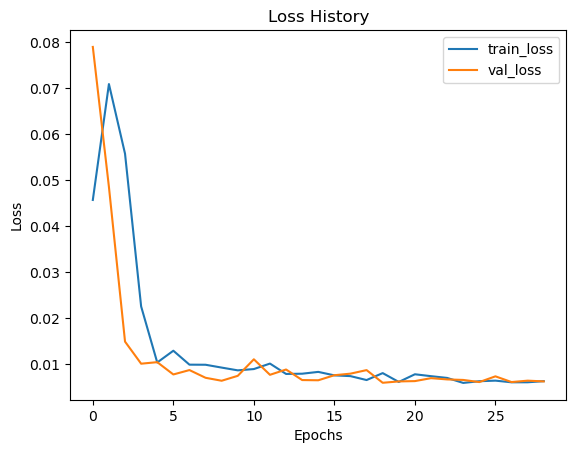

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

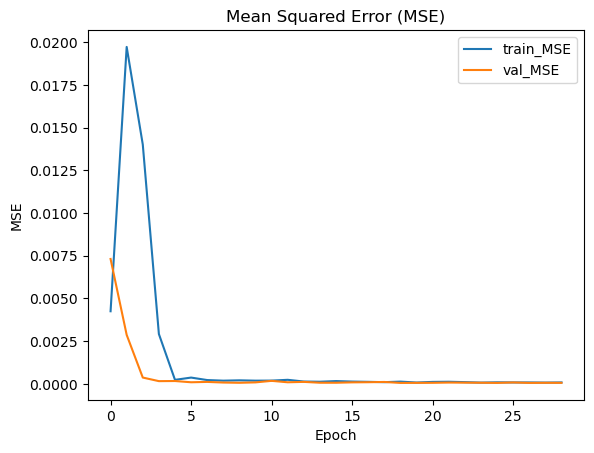

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

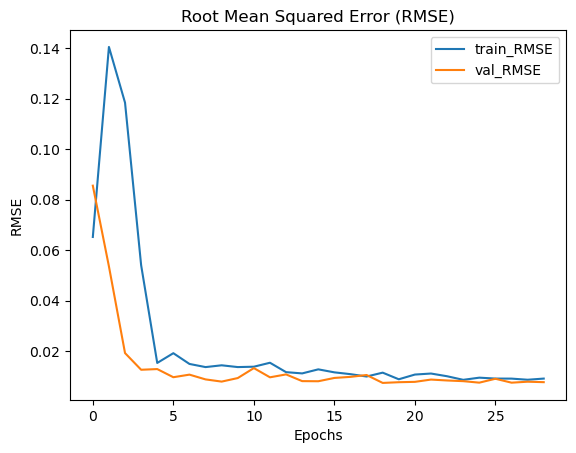

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

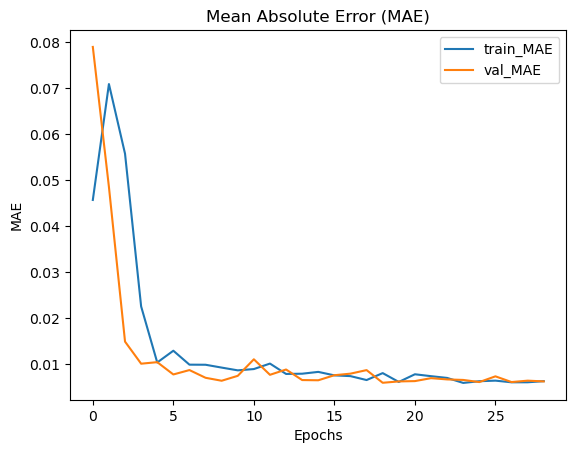

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

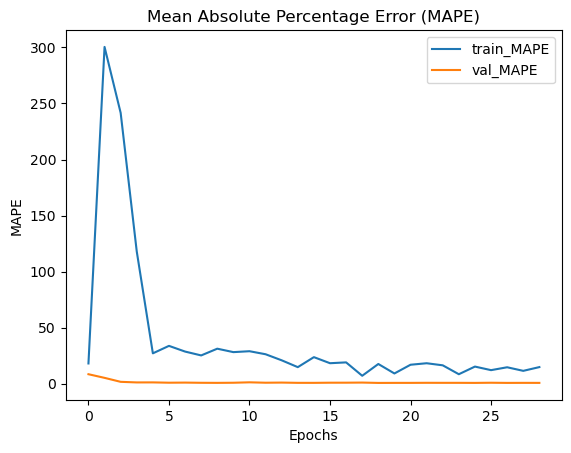

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:37:58.215034: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 2)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


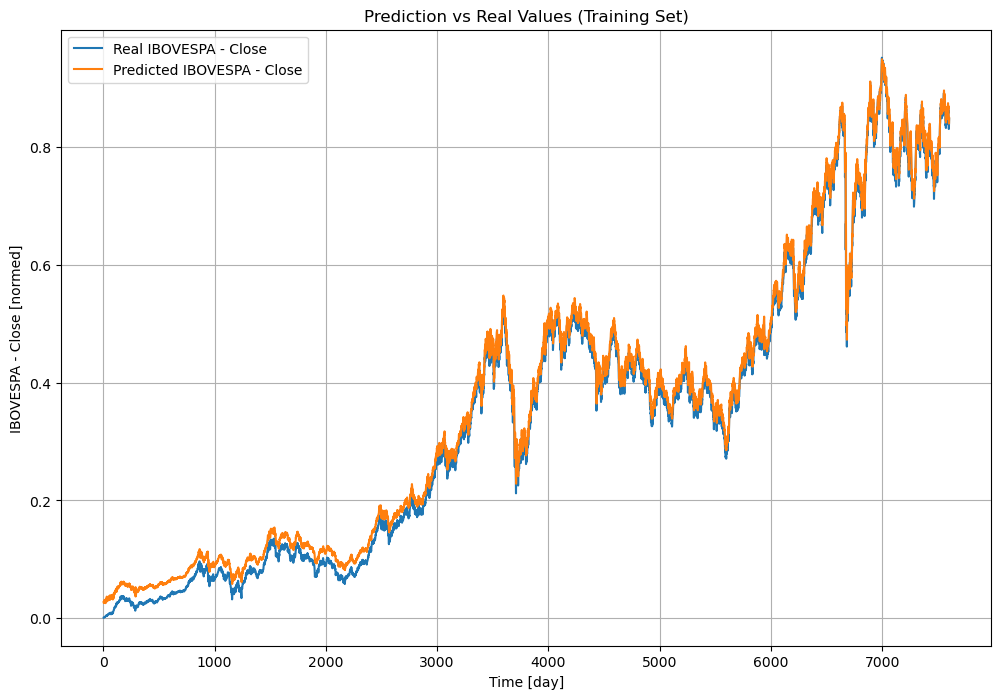

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


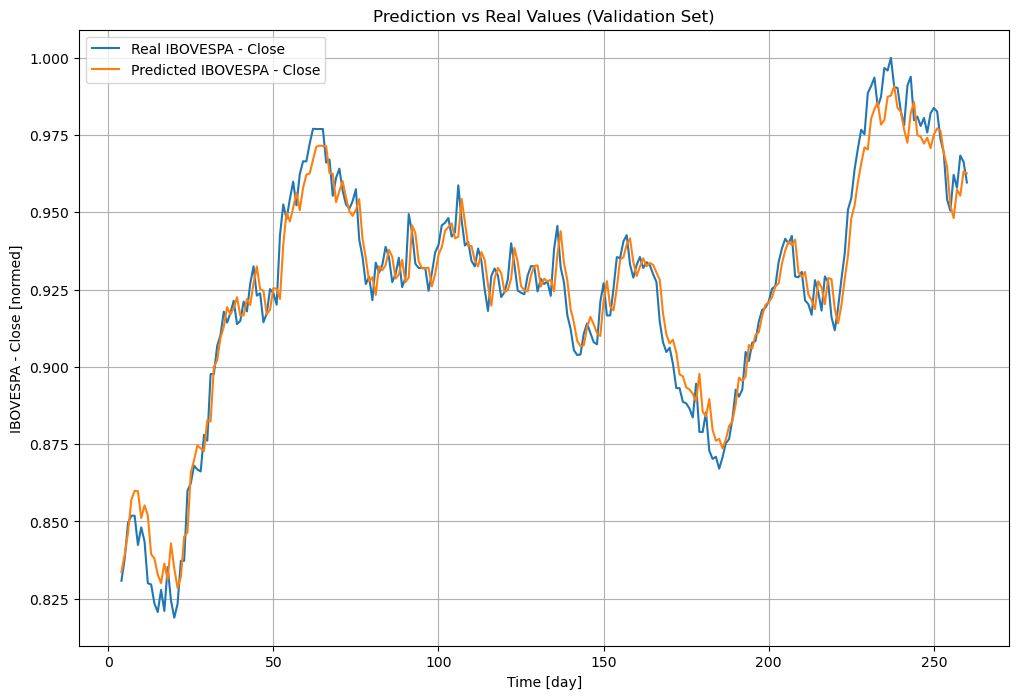

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


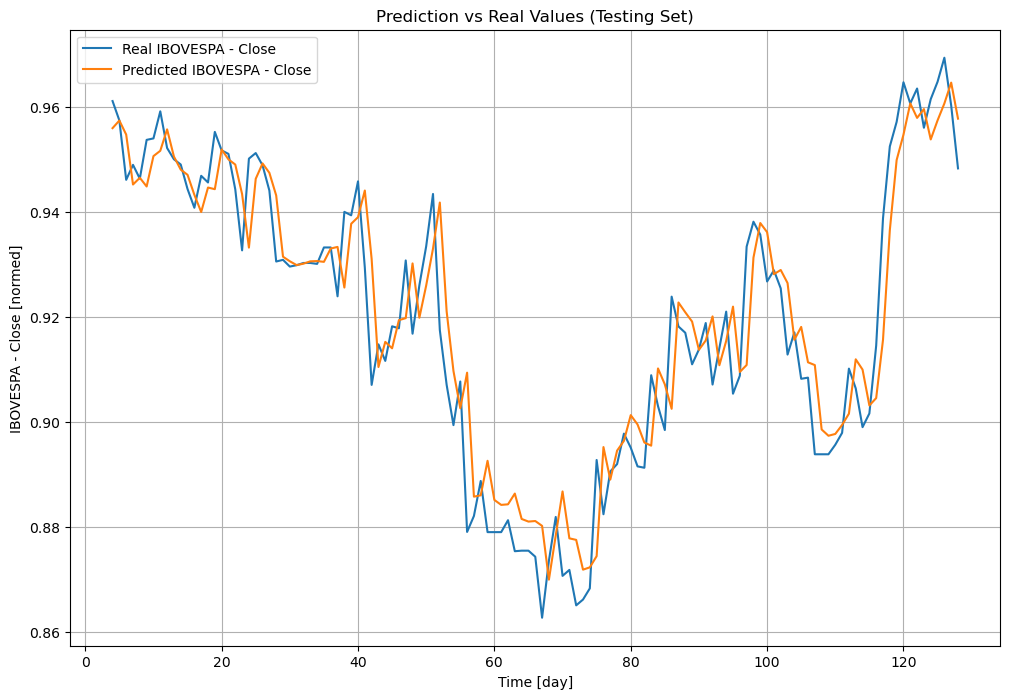

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

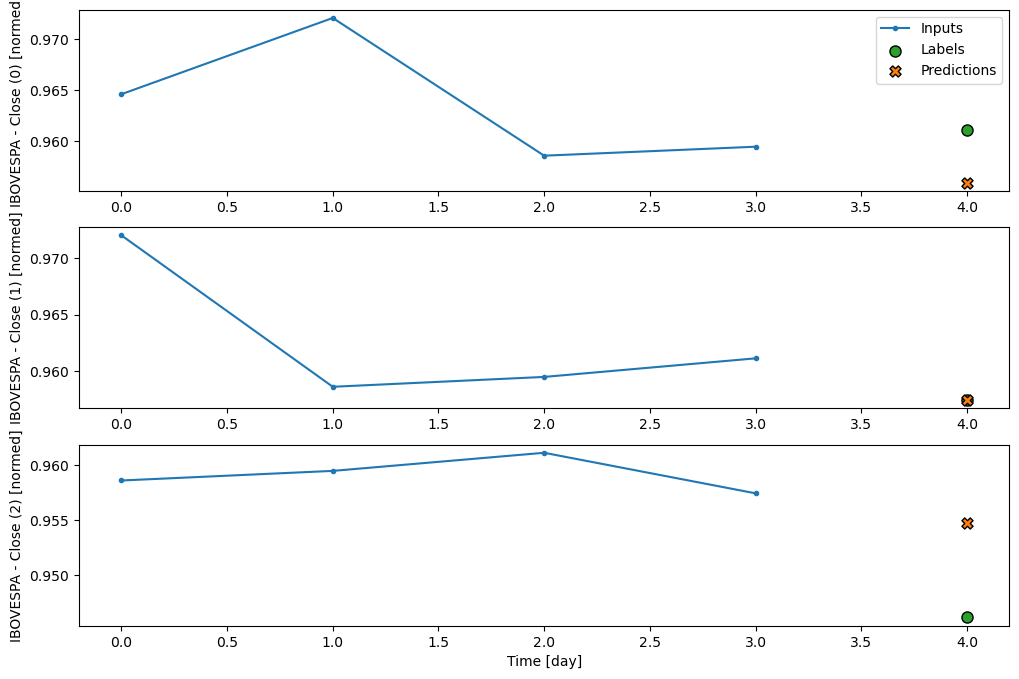

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:1s:885ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


array([[[0.9559522 , 0.9559522 , 0.9559522 , ..., 0.9559522 ,
         0.9559522 , 0.9559522 ]],

       [[0.9574061 , 0.9574061 , 0.9574061 , ..., 0.9574061 ,
         0.9574061 , 0.9574061 ]],

       [[0.95472527, 0.95472527, 0.95472527, ..., 0.95472527,
         0.95472527, 0.95472527]],

       ...,

       [[0.9606545 , 0.9606545 , 0.9606545 , ..., 0.9606545 ,
         0.9606545 , 0.9606545 ]],

       [[0.9646262 , 0.9646262 , 0.9646262 , ..., 0.9646262 ,
         0.9646262 , 0.9646262 ]],

       [[0.95776075, 0.95776075, 0.95776075, ..., 0.95776075,
         0.95776075, 0.95776075]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')